In [1]:
import numpy as np #for numerical computations
import pandas as pd #for dataframe operations

from matplotlib import pyplot as plt #for viewing images and plots
%matplotlib inline 
#So that Matplotlib plots don't open in separate windows outside the notebook

import urllib #For fetching data from Web URLs

import cv2   #For image processing

from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of dataset

#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
objek = 'hand'

In [3]:
def prepare_data(file_name):
    df = pd.read_csv(r'{}'.format(file_name), names=["path", "target"])
    print(df["path"].head())
    np.where(df.applymap(lambda x: x == ''))
    
    # X Input Data
    image_list = []

    for path in df['path'] :
#         print(path) 
        image_arr = cv2.imread(path)
        image_224x224 = cv2.resize(image_arr, (224, 224))
        image_list.append(image_224x224.astype('float')) 
    X = np.array(image_list)
    print("Total Data = ", X.shape)

    # Y Output Data
    encoder = LabelEncoder()
    Targets = encoder.fit_transform(df['target'])
    n_classes = 2
    Y = to_categorical(Targets, num_classes = n_classes)
    
    return X, Y

In [4]:
X, Y = prepare_data("{}_with_label_randomized.csv".format(objek))
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=13)
print("Data Train", X_train.shape)
print("Data Val", X_val.shape)

0    MURA-v1.1/train/XR_HAND/patient10169/study1_ne...
1    MURA-v1.1/train/XR_HAND/patient10121/study1_po...
2    MURA-v1.1/train/XR_HAND/patient09111/study1_ne...
3    MURA-v1.1/train/XR_HAND/patient11008/study1_ne...
4    MURA-v1.1/train/XR_HAND/patient09780/study1_po...
Name: path, dtype: object
Total Data =  (5543, 224, 224, 3)
Data Train (4711, 224, 224, 3)
Data Val (832, 224, 224, 3)


In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import tensorflow as tf 
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# for layer in base_model.layers:
#     layer.trainable = False

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(2, activation='softmax'))

base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [6]:
save_at = "RestNet_Model/restnet_{}.h5".format(objek)
save_best = ModelCheckpoint (save_at, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='max')
hist = base_model.fit(X_train, Y_train, validation_data = (X_val, Y_val), callbacks=[save_best], batch_size=128, epochs = 50)

Train on 4711 samples, validate on 832 samples
Epoch 1/50
4711/4711 [==============================] - 35s 7ms/sample - loss: 3.4815 - acc: 0.5561 - val_loss: 2.0486 - val_acc: 0.6899
Epoch 2/50
4711/4711 [==============================] - 21s 5ms/sample - loss: 1.9051 - acc: 0.6442 - val_loss: 1.8686 - val_acc: 0.6611
Epoch 3/50
4711/4711 [==============================] - 21s 5ms/sample - loss: 1.4719 - acc: 0.6833 - val_loss: 1.8514 - val_acc: 0.6202
Epoch 4/50
4711/4711 [==============================] - 22s 5ms/sample - loss: 1.2004 - acc: 0.7103 - val_loss: 1.9539 - val_acc: 0.6130
Epoch 5/50
4711/4711 [==============================] - 22s 5ms/sample - loss: 0.9831 - acc: 0.7434 - val_loss: 2.1110 - val_acc: 0.5901
Epoch 6/50
4711/4711 [==============================] - 22s 5ms/sample - loss: 0.8272 - acc: 0.7688 - val_loss: 2.0780 - val_acc: 0.6130
Epoch 7/50
4711/4711 [==============================] - 22s 5ms/sample - loss: 0.6898 - acc: 0.8007 - val_loss: 2.1751 - val_acc: 0

In [7]:
# model.save('vgg_{}_81_float.h5'.format(objek))

In [8]:
X_test, Y_test = prepare_data("{}_val_path_label.csv".format(objek))
# X_test, Y_test = prepare_data("finger_val_path_label.csv")

0    MURA-v1.1/valid/XR_HAND/patient11365/study1_ne...
1    MURA-v1.1/valid/XR_HAND/patient11601/study1_ne...
2    MURA-v1.1/valid/XR_HAND/patient11597/study1_ne...
3    MURA-v1.1/valid/XR_HAND/patient11519/study1_po...
4    MURA-v1.1/valid/XR_HAND/patient11509/study1_po...
Name: path, dtype: object
Total Data =  (460, 224, 224, 3)


In [9]:
model_load = load_model("RestNet_Model/restnet_{}.h5".format(objek))
score = model_load.evaluate(X_test, Y_test, verbose=0)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

Accuracy over the test set: 
  62.39 %


In [10]:
Y_pred = model_load.predict(X_test)

In [11]:
X_test.shape

(460, 224, 224, 3)

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x24e24f4b848>, (-0.5, 223.5, 223.5, -0.5))

NameError: name 'encoder' is not defined

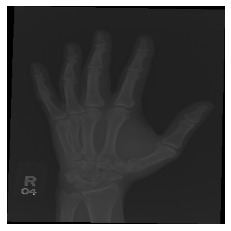

In [12]:
np.random.seed(87)
for rand_num in np.random.randint(0, len(Y_test), 15):
  plt.figure()
  plt.imshow(X_test[rand_num].astype('int')), plt.axis('off')
  if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(Y_test[rand_num] == 1)[0].sum():
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
  else :
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')